# Task: Read in exchange details and identify arbitrage opportunities

In [1]:
import pandas as pd
import numpy as np
import os

exs = pd.read_csv('exchanges.csv', index_col=0)



In [2]:
from exchanges import GDAX, Bitstamp

In [3]:
cwd = os.getcwd()
api_pass = open(os.path.join(cwd, '..', 'pw/GDAX_passphrase.txt')).read()
api_secret = open(os.path.join(cwd, '..', 'pw/GDAX_API_secret.txt')).read()
api_key = open(os.path.join(cwd, '..', 'pw/GDAX_API_key.txt')).read()
price_dict = {}
G = GDAX.CoinbaseManager(api_key, api_secret, api_pass)
price_dict['GDAX'] = G.get_prices()
b = Bitstamp.BitstampManager()
price_dict['BitStamp'] = b.get_prices()
price_df = pd.DataFrame.from_dict(price_dict, orient='index')
print(price_df)

             bid     ask
BitStamp  603.61  605.98
GDAX      642.98  642.99


In [4]:
exs[['bid', 'ask']] = price_df[['bid', 'ask']]
print(exs)

         Location  Pay in  Pay out  Transaction  API  Public API Key  \
Exchange                                                               
GDAX         Cali       0     0.15       0.0000    1             NaN   
BitStamp      Lux       0     0.90       0.0025    1             NaN   
Kracken       NaN       0     0.09       0.0016    1             NaN   
cex.io        NaN       0     3.50       0.0016    1             NaN   
Bitbay        NaN       0     1.50       0.0030    1             NaN   
Poloniex      NaN       0     0.00       0.0025    1             NaN   
Coinmam       NaN       0      NaN       0.0000    1             NaN   

                       URL                         Comments     bid     ask  
Exchange                                                                     
GDAX          www.gdax.com                              NaN  642.98  642.99  
BitStamp  www.bitstamp.net                              NaN  603.61  605.98  
Kracken     www.kraken.com             

In [5]:
df = exs[['Pay in', 'Pay out', 'Transaction']]
df['bid'] = pd.to_numeric(exs.bid, errors='coerce')
df['ask'] = pd.to_numeric(exs.ask, errors='coerce')
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, GDAX to Coinmam
Data columns (total 5 columns):
Pay in         7 non-null int64
Pay out        6 non-null float64
Transaction    7 non-null float64
bid            2 non-null float64
ask            2 non-null float64
dtypes: float64(4), int64(1)
memory usage: 336.0+ bytes
          Pay in  Pay out  Transaction     bid     ask
Exchange                                              
GDAX           0     0.15       0.0000  642.98  642.99
BitStamp       0     0.90       0.0025  603.61  605.98
Kracken        0     0.09       0.0016     NaN     NaN
cex.io         0     3.50       0.0016     NaN     NaN
Bitbay         0     1.50       0.0030     NaN     NaN
Poloniex       0     0.00       0.0025     NaN     NaN
Coinmam        0      NaN       0.0000     NaN     NaN


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df['100EUR->ETH'] = ((100 - df['Pay in'] ) * (1-df['Transaction'])) / (df['ask']-0.01)
df['Out Ex'] = 'N/A'
df['ETH->EUR'] = np.nan
print(df)

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


          Pay in  Pay out  Transaction     bid     ask  100EUR->ETH Out Ex  \
Exchange                                                                     
GDAX           0     0.15       0.0000  642.98  642.99     0.155526    N/A   
BitStamp       0     0.90       0.0025  603.61  605.98     0.164612    N/A   
Kracken        0     0.09       0.0016     NaN     NaN          NaN    N/A   
cex.io         0     3.50       0.0016     NaN     NaN          NaN    N/A   
Bitbay         0     1.50       0.0030     NaN     NaN          NaN    N/A   
Poloniex       0     0.00       0.0025     NaN     NaN          NaN    N/A   
Coinmam        0      NaN       0.0000     NaN     NaN          NaN    N/A   

          ETH->EUR  
Exchange            
GDAX           NaN  
BitStamp       NaN  
Kracken        NaN  
cex.io         NaN  
Bitbay         NaN  
Poloniex       NaN  
Coinmam        NaN  


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df_copy = df.copy()
for ex in df.index:
    temp_df = df_copy.copy()
    temp_df['Out Ex'] = ex
    print(temp_df.loc[ex, '100EUR->ETH'])
    print('-----')
    print(temp_df)
    temp_df['ETH->EUR'] = ((temp_df.loc[ex, '100EUR->ETH'] * (1-temp_df['Transaction'])) * (temp_df['bid'] +0.01))-100
    df = df.append(temp_df)
print(df.info())

0.155525832841
-----
          Pay in  Pay out  Transaction     bid     ask  100EUR->ETH Out Ex  \
Exchange                                                                     
GDAX           0     0.15       0.0000  642.98  642.99     0.155526   GDAX   
BitStamp       0     0.90       0.0025  603.61  605.98     0.164612   GDAX   
Kracken        0     0.09       0.0016     NaN     NaN          NaN   GDAX   
cex.io         0     3.50       0.0016     NaN     NaN          NaN   GDAX   
Bitbay         0     1.50       0.0030     NaN     NaN          NaN   GDAX   
Poloniex       0     0.00       0.0025     NaN     NaN          NaN   GDAX   
Coinmam        0      NaN       0.0000     NaN     NaN          NaN   GDAX   

          ETH->EUR  
Exchange            
GDAX           NaN  
BitStamp       NaN  
Kracken        NaN  
cex.io         NaN  
Bitbay         NaN  
Poloniex       NaN  
Coinmam        NaN  
0.16461210951
-----
          Pay in  Pay out  Transaction     bid     ask  100EUR->ETH

In [8]:
df_pivot = df.pivot(columns='Out Ex', values='ETH->EUR')


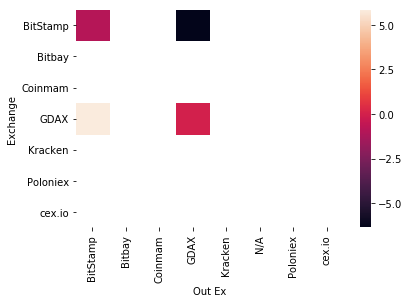

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df_pivot)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class opp_finder():
    def __init__(self):
        #import data from exchanges and copy 
        self.exs = pd.read_csv('exchanges.csv', index_col=0)
        df = self.exs[['Pay in', 'Pay out', 'Transaction']]
        df['bid'] = pd.to_numeric(self.exs.bid, errors='coerce')
        df['ask'] = pd.to_numeric(self.exs.ask, errors='coerce')
        
        #Calculate ETH from 100 EUR
        df['100EUR->ETH'] = ((100 - df['Pay in'] ) * (1-df['Transaction'])) / (df['ask']-0.01)
        df['Out Ex'] = 'N/A'
        df['ETH->EUR'] = np.nan
        
        #Calculate ETH for every possible transaction
        df_copy = df.copy()
        for ex in df.index:
            temp_df = df_copy.copy()
            temp_df['Out Ex'] = ex
            print(temp_df.loc[ex, '100EUR->ETH'])
            print('-----')
            print(temp_df)
            temp_df['ETH->EUR'] = ((temp_df.loc[ex, '100EUR->ETH'] * (1-temp_df['Transaction'])) * (temp_df['bid'] +0.01))-100
            df = df.append(temp_df)
            
        #Pivot results
        self.profits = df.pivot(columns='Out Ex', values='ETH->EUR')
        
    def plot_profits(self):
        sns.heatmap(df_pivot)
        plt.show()